In [1]:
from IPython.display import Markdown as md
import warnings
import numpy as np
import control as ctrl
import control.matlab
from lcapy import s
from lcapy.discretetime import z
import math            
import cmath
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':[16,9],
                     'font.size': 16, 
                     'xaxis.labellocation': 'right',
                     'yaxis.labellocation': 'top'});

def tf_control_2_lcapy(tf):
    tfout = 0;
    temp = 0;
     
    num = tf.num[0][0];
    den = tf.den[0][0];
    
    if ctrl.isctime(tf):
        for i in range(len(num)):
            tfout += num[i]*(s**(len(num)-1-i));
        
        for i in range(len(den)):
            temp += den[i]*(s**(len(den)-1-i));
        tfout /= temp;
    else:
        for i in range(len(num)):
            tfout += num[i]*(z**(len(num)-1-i));
        
        for i in range(len(den)):
            temp += den[i]*(z**(len(den)-1-i));
        tfout /= temp;
            
    return tfout;

In [2]:
# Função de transferência G(s) do item a):

Gsa = ctrl.tf(100,[1, 10, 100]);
print("a) Sistema continuo: \n\t G(s) = \n");
Gsa

a) Sistema continuo: 
	 G(s) = 



TransferFunction(array([100]), array([  1,  10, 100]))

In [3]:
# Função de transferência G(z) com tempo de amostragem de 0,1 s do item a):

Ta = 0.1;
Gza = ctrl.c2d(Gsa,Ta);
print("Sistema discreto com T = 0,1 s: \n\t G(z) = \n");
Gza

Sistema discreto com T = 0,1 s: 
	 G(z) = 



TransferFunction(array([0.34029985, 0.24168648]), array([ 1.        , -0.78589311,  0.36787944]), 0.1)

In [4]:
# Cálculo dos erros às entradas degrau, rampa e parábola do item a):

GH_pa = tf_control_2_lcapy(Gza);
GH_va = (1-1/z)*tf_control_2_lcapy(Gza)/Ta;
GH_aa = ((1-1/z)**2)*tf_control_2_lcapy(Gza)/(Ta**2);

ess_pa = 1/(1+(GH_pa.subs(z, 1)).val);
ess_va = 1/(GH_va.subs(z, 1).val);
ess_aa = 1/(GH_aa.subs(z, 1).val);

In [5]:
# Tabela dos erros às entradas degrau, rampa e parábola do item a):

md("""
<style>
.rendered_html table, .rendered_html td, .rendered_html th {{
    font-size: 125%;
}}
table th:first-of-type {{
    width: 50%;
}}
table th:nth-of-type(2) {{
    width: 50%;
}}
</style>

| Tipo de entrada              | $e_{{ss}}$          |
|:---------------------------- |:-------------------:|
| Entrada em degrau            | {:.2f}              |
| Entrada em rampa             | {}                  |
| Entrada em parábola          | {}                  |
""".format(ess_pa.fval, str(ess_va).replace('z', ''), str(ess_aa).replace('z', '')))


<style>
.rendered_html table, .rendered_html td, .rendered_html th {
    font-size: 125%;
}
table th:first-of-type {
    width: 50%;
}
table th:nth-of-type(2) {
    width: 50%;
}
</style>

| Tipo de entrada              | $e_{ss}$          |
|:---------------------------- |:-------------------:|
| Entrada em degrau            | 0.50              |
| Entrada em rampa             | oo                  |
| Entrada em parábola          | oo                  |


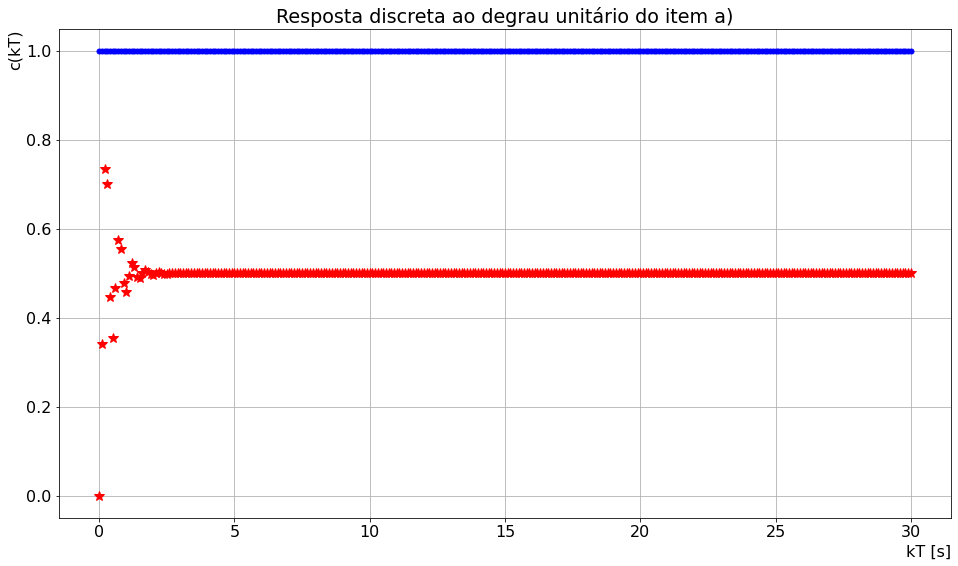

Erro ao degrau = 
	 0.5


In [6]:
# Verificação do erro à entrada degrau do item a):

FTMF_a = control.feedback(Gza,1);

tfinal = 30;
Kmax = int(tfinal/Ta+1);
t = np.linspace(0, tfinal, Kmax);
degrau = np.heaviside(t,1);

degrau_a = ctrl.step_response(FTMF_a, t)[1];

fig = plt.figure();
ax = fig.add_subplot(1, 1, 1);
ax.plot(t, degrau, 'b.', markersize=10);
ax.plot(t, degrau_a, 'r*', markersize=10);
ax.set_title("Resposta discreta ao degrau unitário do item a)");
ax.set_xlabel("kT [s]");
ax.set_ylabel("c(kT)");
ax.grid();
plt.show();

erro = degrau[-1]-degrau_a[-1];
print("Erro ao degrau = \n\t",erro);

In [7]:
# Função de transferência G(s) do item b):

Gsb = ctrl.tf(1,[1, 1, 0]);
print("b) Sistema continuo: \n\t G(s) = \n");
Gsb

b) Sistema continuo: 
	 G(s) = 



TransferFunction(array([1]), array([1, 1, 0]))

In [8]:
# Função de transferência G(z) com tempo de amostragem de 0,1 s do item b):

Tb = 0.1;
Gzb = ctrl.c2d(Gsb,Tb);
print("Sistema discreto com T = 0,1 s: \n\t G(z) = \n");
Gzb

Sistema discreto com T = 0,1 s: 
	 G(z) = 



TransferFunction(array([0.00483742, 0.00467884]), array([ 1.        , -1.90483742,  0.90483742]), 0.1)

In [9]:
# Cálculo dos erros às entradas degrau, rampa e parábola do item b):

GH_pb = tf_control_2_lcapy(Gzb);
GH_vb = ((1-1/z)*tf_control_2_lcapy(Gzb)/Tb).cancel();
GH_ab = (((1-1/z)**2)*tf_control_2_lcapy(Gzb)/(Tb**2)).cancel();

ess_pb = 1/(1+(GH_pb.subs(z, 1)).val);
ess_vb = 1/(GH_vb.subs(z, 1).val);
ess_ab = 1/(GH_ab.subs(z, 1).val);

In [10]:
# Tabela dos erros às entradas degrau, rampa e parábola do item b):

md("""
<style>
.rendered_html table, .rendered_html td, .rendered_html th {{
    font-size: 125%;
table th:first-of-type {{
    width: 50%;
}}
table th:nth-of-type(2) {{
    width: 50%;
}}
</style>

| Tipo de entrada              | $e_{{ss}}$          |
|:---------------------------- |:-------------------:|
| Entrada em degrau            | {:.2f}              |
| Entrada em rampa             | {:.2f}              |
| Entrada em parábola          | {}                  |
""".format(ess_pb.fval, ess_vb.fval, str(ess_ab).replace('z', '')))


<style>
.rendered_html table, .rendered_html td, .rendered_html th {
    font-size: 125%;
table th:first-of-type {
    width: 50%;
}
table th:nth-of-type(2) {
    width: 50%;
}
</style>

| Tipo de entrada              | $e_{ss}$          |
|:---------------------------- |:-------------------:|
| Entrada em degrau            | 0.00              |
| Entrada em rampa             | 1.00              |
| Entrada em parábola          | oo                  |


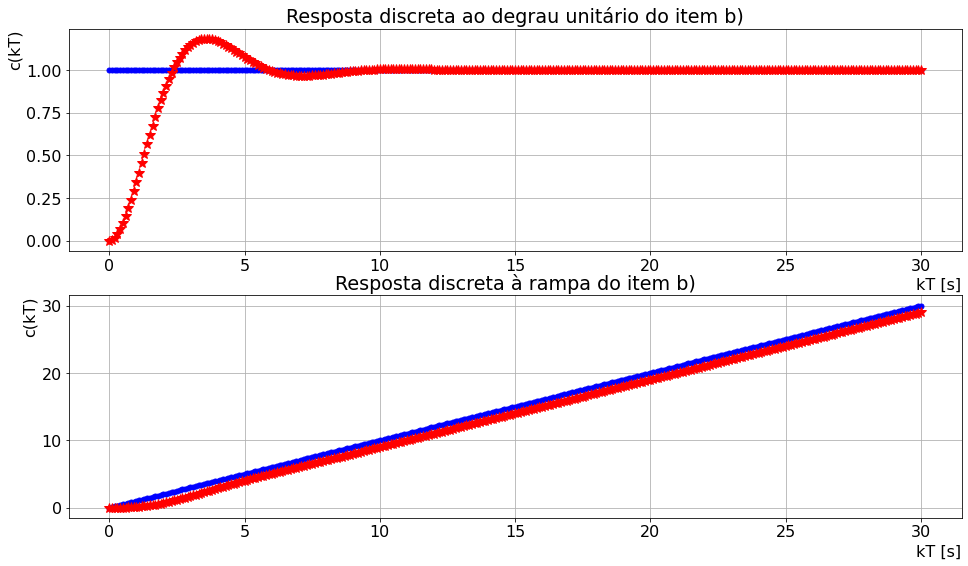

Erro ao degrau = 
	 5.480858045192605e-07 

Erro à rampa = 
	 1.0000001669387402


In [11]:
# Verificação do erro às entradas degrau e rampa do item b):

FTMF_b = control.feedback(Gzb,1);

tfinal = 30;
Kmax = int(tfinal/Tb+1);
t = np.linspace(0, tfinal, Kmax);

degrau = np.heaviside(t,1);
rampa = t*np.heaviside(t,1);

warnings.filterwarnings('ignore');
degrau_b = ctrl.step_response(FTMF_b, t)[1];
rampa_b = ctrl.matlab.lsim(FTMF_b, rampa, t)[0];

fig = plt.figure();
ax = fig.add_subplot(2, 1, 1);
ax.plot(t, degrau, 'b.', markersize=10);
ax.plot(t, degrau_b, 'r*', markersize=10);
ax.set_title("Resposta discreta ao degrau unitário do item b)");
ax.set_xlabel("kT [s]");
ax.set_ylabel("c(kT)");
ax.grid();

ax = fig.add_subplot(2, 1, 2);
ax.plot(t, rampa, 'b.', markersize=10);
ax.plot(t, rampa_b, 'r*', markersize=10);
ax.set_title("Resposta discreta à rampa do item b)");
ax.set_xlabel("kT [s]");
ax.set_ylabel("c(kT)");
ax.grid();

plt.show();

erro_degrau = degrau[-1]-degrau_b[-1];
print("Erro ao degrau = \n\t",erro_degrau,"\n");

erro_rampa = rampa[-1]-rampa_b[-1];
print("Erro à rampa = \n\t",erro_rampa);